<a href="https://colab.research.google.com/github/AatirNadim/Colab-Notebooks/blob/main/Ad_sale_prediction_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded =files.upload()

In [ ]:
df=pd.read_csv('/content/DigitalAd_dataset.csv')
df

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1
...,...,...,...
395,35,65000,0
396,26,80000,0
397,26,52000,0
398,20,86000,0


In [ ]:
df.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [ ]:
Y.sum()

143

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


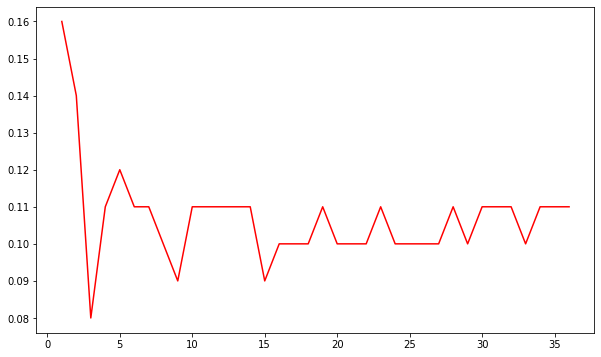

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,37):
  kmodel=KNeighborsClassifier(n_neighbors=i)
  kmodel.fit(X_train, Y_train)
  pred=kmodel.predict(X_test)
  error.append(np.mean(pred!=Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,37),error, color='red', markersize=10, markerfacecolor='blue')

In [ ]:
finalModel=KNeighborsClassifier(n_neighbors=3 ,metric='minkowski', p=2)
finalModel.fit(X_train, Y_train)
Y_pred=finalModel.predict(X_test)

In [ ]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(Y_pred, Y_test)
print('The confusion matrix is ')
print(cm)
print('The accuracy score is ')
print(accuracy_score(Y_pred,Y_test)*100)

The confusion matrix is 
[[57  4]
 [ 4 35]]
The accuracy score is 
92.0
